In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
np.random.seed(5)

In [12]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy(n=11):
    inputs = []
    labels = []
    step = 1/(n-1)
    for i in range(n):
        inputs.append([step*i, step*i])
        labels.append(0)
        
        if i == int((n-1)/2):
            continue
        
        inputs.append([step*i, 1 - step*i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(n*2 - 1,1)
def show_data(xs, ys, ts):
    cm = LinearSegmentedColormap.from_list(
        'mymap', [(1, 0, 0), (0, 0, 1)], N=2)
    n = len(xs)
    plt.figure(figsize=(5*n, 5))
    for i, x, y, t in zip(range(n), xs, ys, ts):
        y = np.round(y)
        plt.subplot(1,n, i+1)
        plt.title(t, fontsize=18)
        plt.scatter(x[:,0], x[:,1], c=y[:,0], cmap=cm)
    
    plt.show()
def show_result(x, y, pred_y):
    x = np.array(x)
    y = np.array(y)
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')

    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(sigmoid(x), 1.0 - sigmoid(x))

def MSE_loss(y, y_hat):
    return np.mean((y - y_hat)**2)
    
def derivative_MSE_loss(y, y_hat):
    return (y - y_hat)*(2/y.shape[0])

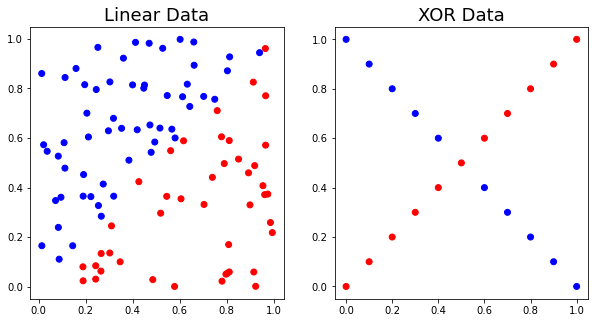

In [13]:
x1, y1 = generate_linear()
x2, y2 = generate_XOR_easy()
show_data([x1,x2], [y1,y2], ['Linear Data', 'XOR Data'])

In [84]:
class linear:
    def __init__(self,in_size,out_size,act):
        self.prev_X = np.zeros((1,in_size))
        self.prev_Y = np.zeros((1,out_size))
        self.W = np.random.uniform(0,1,(in_size,out_size))
        self.W_grad = np.zeros((in_size,out_size))
        self.backward_gradient = np.zeros(out_size)
        self.act = act
        print("Initial weight")
        print(self.W)
        #print(f"Initial weight:{self.W}")
        

    #calculate the value W*X, and store X for gradient calculation
    def forward(self,X):
        #self.prev_X = X
        self.prev_X = np.copy(X)
        self.prev_Y = np.matmul(X,self.W)
        #print(f"X={self.prev_X}")
        #print(f"W={self.W}")
        #print(f"X*M={self.prev_Y}")
        #print(f"sigmoid(X*M)={sigmoid(self.prev_Y)}")
        if(self.act == 'sigmoid'):
            return sigmoid(self.prev_Y)
        elif(self.act == 'no'):
            return np.copy(self.prev_Y)


    def backword(self,derivative):
        if(self.act == 'sigmoid'):
            #print(f"input of act{self.prev_Y}")
            #print(f"act{derivative_sigmoid(self.prev_Y)}")
            #print(f"derivative:{derivative}")
            #print(f"derivative_sigmoid(self.prev_Y):{derivative_sigmoid(self.prev_Y)}")
            self.backward_gradient = derivative*derivative_sigmoid(self.prev_Y)
            #print(f"g:{self.backward_gradient}")
        elif(self.act == 'no'):
            self.backward_gradient = derivative*np.ones(self.prev_Y.shape[1])
        return np.matmul(self.W,self.backward_gradient.T)

    def get_weights(self,learning_rate):
        for i in range(len(self.prev_X[0])):
            for j in range(len(self.prev_Y[0])):
                #print(f"self.prev_X[0][{i}]={self.prev_X[0][i]}")
                self.W_grad[i][j] -= learning_rate*self.prev_X[0][i]*self.backward_gradient[0][j]
        #print("Gradient After BP:")
        #print(self.W_grad)
        #self.W_grad[:] = 0
    def update_weights(self,batch_size):
        #print("Before")
        #print(self.W)
        self.W += self.W_grad/batch_size
        
        #print("Updated Grad")
        #print(self.W_grad)
        self.W_grad[:] = 0
        #print("After")
        #print(self.W)
        
    
    def debug(self):
        return self.W
        
        

In [85]:
class My_NN:
    def __init__(self,learning_rate = 0.1):
        self.layers = []
        self.learning_rate = learning_rate
    def forward(self,X):
        in_data = X
        for l in self.layers:
            in_data = l.forward(in_data)
        return in_data
    def backword(self,derivative):
        back_dev = derivative
        for l in reversed(self.layers):
            
            back_dev = l.backword(back_dev)
            l.get_weights(self.learning_rate)
        #return back_dev
        
    def add_linear_layer(self,in_size,out_size,act):
        l = linear(in_size,out_size,act)
        self.layers.append(l)
        
    def update_weights(self,batch_size):
        for l in self.layers:
            l.update_weights(batch_size)
            
    def show_weights(self):
        for l in self.layers:
            print(l.debug())
    

In [86]:
np.random.seed(5)
n = My_NN()


In [87]:
n.add_linear_layer(in_size = 2, out_size = 4, act = 'no')
n.add_linear_layer(in_size = 4, out_size = 1, act = 'sigmoid')

Initial weight
[[0.22199317 0.87073231 0.20671916 0.91861091]
 [0.48841119 0.61174386 0.76590786 0.51841799]]
Initial weight
[[0.2968005 ]
 [0.18772123]
 [0.08074127]
 [0.7384403 ]]


In [88]:
test_x = x1[2:4]
test_y = y1[2:4]
for i in range(10000):
    print(f"epoch {i}")
    loss = 0
    for data,label in zip(x1,y1):
        ret = n.forward(np.array(data).reshape(1,2))     
        #print(f"ret:{ret}")
        #print(f"MSE:{MSE_loss(ret,label)}")
        loss += MSE_loss(ret,label)
        #print(MSE_loss(ret,label))
        #print(f"d MSE:{derivative_MSE_loss(ret,label)}")
        n.backword(derivative_MSE_loss(ret,label))
        #print(f"ans:{ret}")
        #break
        
    
    print(f"MSE loss = {loss/len(x1)}")
    n.update_weights(len(x1))
    print("             ")
    
    #n.show_weights()
    
    

epoch 0
MSE loss = 0.27075780377469877
             
epoch 1
MSE loss = 0.2701263168128346
             
epoch 2
MSE loss = 0.2695038870300137
             
epoch 3
MSE loss = 0.2688905436779745
             
epoch 4
MSE loss = 0.26828630544037924
             
epoch 5
MSE loss = 0.2676911806589963
             
epoch 6
MSE loss = 0.26710516758298963
             
epoch 7
MSE loss = 0.2665282546394816
             
epoch 8
MSE loss = 0.2659604207235132
             
epoch 9
MSE loss = 0.2654016355054986
             
epoch 10
MSE loss = 0.2648518597542462
             
epoch 11
MSE loss = 0.2643110456736327
             
epoch 12
MSE loss = 0.26377913725101876
             
epoch 13
MSE loss = 0.2632560706155272
             
epoch 14
MSE loss = 0.2627417744043414
             
epoch 15
MSE loss = 0.26223617013522965
             
epoch 16
MSE loss = 0.2617391725835602
             
epoch 17
MSE loss = 0.2612506901621409
             
epoch 18
MSE loss = 0.2607706253022856
            

MSE loss = 0.22559801913098682
             
epoch 161
MSE loss = 0.2253689550109847
             
epoch 162
MSE loss = 0.2251389302663766
             
epoch 163
MSE loss = 0.22490793652747038
             
epoch 164
MSE loss = 0.22467596554076302
             
epoch 165
MSE loss = 0.22444300916429477
             
epoch 166
MSE loss = 0.22420905936317662
             
epoch 167
MSE loss = 0.22397410820529154
             
epoch 168
MSE loss = 0.22373814785716375
             
epoch 169
MSE loss = 0.22350117057999036
             
epoch 170
MSE loss = 0.22326316872583324
             
epoch 171
MSE loss = 0.22302413473396515
             
epoch 172
MSE loss = 0.22278406112736715
             
epoch 173
MSE loss = 0.2225429405093746
             
epoch 174
MSE loss = 0.22230076556046502
             
epoch 175
MSE loss = 0.22205752903518963
             
epoch 176
MSE loss = 0.22181322375923831
             
epoch 177
MSE loss = 0.2215678426266405
             
epoch 178
MSE loss = 0.2

MSE loss = 0.17512008874233026
             
epoch 316
MSE loss = 0.17468815514704658
             
epoch 317
MSE loss = 0.17425513136794205
             
epoch 318
MSE loss = 0.17382103533727938
             
epoch 319
MSE loss = 0.17338588543444367
             
epoch 320
MSE loss = 0.1729497004860567
             
epoch 321
MSE loss = 0.17251249976575742
             
epoch 322
MSE loss = 0.1720743029936381
             
epoch 323
MSE loss = 0.17163513033532993
             
epoch 324
MSE loss = 0.17119500240072838
             
epoch 325
MSE loss = 0.1707539402423505
             
epoch 326
MSE loss = 0.17031196535331666
             
epoch 327
MSE loss = 0.16986909966495178
             
epoch 328
MSE loss = 0.16942536554399482
             
epoch 329
MSE loss = 0.16898078578941494
             
epoch 330
MSE loss = 0.1685353836288255
             
epoch 331
MSE loss = 0.16808918271449186
             
epoch 332
MSE loss = 0.16764220711892783
             
epoch 333
MSE loss = 0.1

MSE loss = 0.11191697039558467
             
epoch 468
MSE loss = 0.11160273230763687
             
epoch 469
MSE loss = 0.11129026780990632
             
epoch 470
MSE loss = 0.1109795709964878
             
epoch 471
MSE loss = 0.11067063575607618
             
epoch 472
MSE loss = 0.11036345577957585
             
epoch 473
MSE loss = 0.11005802456760298
             
epoch 474
MSE loss = 0.10975433543787781
             
epoch 475
MSE loss = 0.10945238153250311
             
epoch 476
MSE loss = 0.1091521558251254
             
epoch 477
MSE loss = 0.10885365112797718
             
epoch 478
MSE loss = 0.10855686009879628
             
epoch 479
MSE loss = 0.10826177524762141
             
epoch 480
MSE loss = 0.10796838894346088
             
epoch 481
MSE loss = 0.10767669342083423
             
epoch 482
MSE loss = 0.10738668078618269
             
epoch 483
MSE loss = 0.10709834302415105
             
epoch 484
MSE loss = 0.10681167200373638
             
epoch 485
MSE loss = 0

MSE loss = 0.0797572629902811
             
epoch 620
MSE loss = 0.0796193221329404
             
epoch 621
MSE loss = 0.079482023060738
             
epoch 622
MSE loss = 0.07934536130036376
             
epoch 623
MSE loss = 0.07920933241698727
             
epoch 624
MSE loss = 0.07907393201392696
             
epoch 625
MSE loss = 0.07893915573231984
             
epoch 626
MSE loss = 0.07880499925079337
             
epoch 627
MSE loss = 0.0786714582851385
             
epoch 628
MSE loss = 0.07853852858798402
             
epoch 629
MSE loss = 0.07840620594847285
             
epoch 630
MSE loss = 0.07827448619193937
             
epoch 631
MSE loss = 0.07814336517958934
             
epoch 632
MSE loss = 0.07801283880818016
             
epoch 633
MSE loss = 0.0778829030097044
             
epoch 634
MSE loss = 0.07775355375107389
             
epoch 635
MSE loss = 0.07762478703380646
             
epoch 636
MSE loss = 0.07749659889371391
             
epoch 637
MSE loss = 0.077

MSE loss = 0.06356036416241834
             
epoch 781
MSE loss = 0.06348709650834523
             
epoch 782
MSE loss = 0.06341407184259229
             
epoch 783
MSE loss = 0.06334128892084831
             
epoch 784
MSE loss = 0.06326874650746736
             
epoch 785
MSE loss = 0.06319644337539355
             
epoch 786
MSE loss = 0.06312437830608648
             
epoch 787
MSE loss = 0.0630525500894474
             
epoch 788
MSE loss = 0.06298095752374634
             
epoch 789
MSE loss = 0.06290959941554967
             
epoch 790
MSE loss = 0.06283847457964868
             
epoch 791
MSE loss = 0.06276758183898852
             
epoch 792
MSE loss = 0.06269692002459845
             
epoch 793
MSE loss = 0.06262648797552178
             
epoch 794
MSE loss = 0.06255628453874779
             
epoch 795
MSE loss = 0.062486308569143105
             
epoch 796
MSE loss = 0.0624165589293847
             
epoch 797
MSE loss = 0.06234703448989301
             
epoch 798
MSE loss = 

MSE loss = 0.05427373969378943
             
epoch 941
MSE loss = 0.0542278296510126
             
epoch 942
MSE loss = 0.05418203799505841
             
epoch 943
MSE loss = 0.054136364258948765
             
epoch 944
MSE loss = 0.05409080797820371
             
epoch 945
MSE loss = 0.05404536869082476
             
epoch 946
MSE loss = 0.05400004593727761
             
epoch 947
MSE loss = 0.05395483926047544
             
epoch 948
MSE loss = 0.053909748205762345
             
epoch 949
MSE loss = 0.05386477232089658
             
epoch 950
MSE loss = 0.053819911156034364
             
epoch 951
MSE loss = 0.053775164263713496
             
epoch 952
MSE loss = 0.05373053119883736
             
epoch 953
MSE loss = 0.05368601151865872
             
epoch 954
MSE loss = 0.05364160478276407
             
epoch 955
MSE loss = 0.05359731055305781
             
epoch 956
MSE loss = 0.05355312839374659
             
epoch 957
MSE loss = 0.05350905787132392
             
epoch 958
MSE los

MSE loss = 0.04820698432964548
             
epoch 1100
MSE loss = 0.048175326508823293
             
epoch 1101
MSE loss = 0.04814373576321571
             
epoch 1102
MSE loss = 0.04811221187562038
             
epoch 1103
MSE loss = 0.04808075462977456
             
epoch 1104
MSE loss = 0.04804936381034994
             
epoch 1105
MSE loss = 0.048018039202947706
             
epoch 1106
MSE loss = 0.047986780594093364
             
epoch 1107
MSE loss = 0.04795558777123153
             
epoch 1108
MSE loss = 0.04792446052272115
             
epoch 1109
MSE loss = 0.04789339863783029
             
epoch 1110
MSE loss = 0.0478624019067313
             
epoch 1111
MSE loss = 0.04783147012049592
             
epoch 1112
MSE loss = 0.04780060307109017
             
epoch 1113
MSE loss = 0.047769800551369715
             
epoch 1114
MSE loss = 0.04773906235507498
             
epoch 1115
MSE loss = 0.04770838827682624
             
epoch 1116
MSE loss = 0.047677778112118985
             

MSE loss = 0.04387051937674312
             
epoch 1260
MSE loss = 0.04384734811563013
             
epoch 1261
MSE loss = 0.04382421840074385
             
epoch 1262
MSE loss = 0.043801130117183
             
epoch 1263
MSE loss = 0.043778083150466544
             
epoch 1264
MSE loss = 0.04375507738653189
             
epoch 1265
MSE loss = 0.04373211271173269
             
epoch 1266
MSE loss = 0.043709189012837185
             
epoch 1267
MSE loss = 0.043686306177026096
             
epoch 1268
MSE loss = 0.04366346409189104
             
epoch 1269
MSE loss = 0.043640662645432364
             
epoch 1270
MSE loss = 0.04361790172605731
             
epoch 1271
MSE loss = 0.043595181222578445
             
epoch 1272
MSE loss = 0.04357250102421139
             
epoch 1273
MSE loss = 0.04354986102057334
             
epoch 1274
MSE loss = 0.04352726110168101
             
epoch 1275
MSE loss = 0.043504701157949084
             
epoch 1276
MSE loss = 0.04348218108018803
             

MSE loss = 0.04062427842677782
             
epoch 1420
MSE loss = 0.04060653139125185
             
epoch 1421
MSE loss = 0.040588811805970224
             
epoch 1422
MSE loss = 0.0405711196044507
             
epoch 1423
MSE loss = 0.04055345472042332
             
epoch 1424
MSE loss = 0.04053581708782944
             
epoch 1425
MSE loss = 0.040518206640820995
             
epoch 1426
MSE loss = 0.040500623313759664
             
epoch 1427
MSE loss = 0.040483067041216
             
epoch 1428
MSE loss = 0.040465537757968635
             
epoch 1429
MSE loss = 0.040448035399003386
             
epoch 1430
MSE loss = 0.04043055989951254
             
epoch 1431
MSE loss = 0.04041311119489406
             
epoch 1432
MSE loss = 0.04039568922075061
             
epoch 1433
MSE loss = 0.04037829391288885
             
epoch 1434
MSE loss = 0.04036092520731871
             
epoch 1435
MSE loss = 0.040343583040252436
             
epoch 1436
MSE loss = 0.040326267348103996
             

MSE loss = 0.03812256090931195
             
epoch 1578
MSE loss = 0.03810844499318425
             
epoch 1579
MSE loss = 0.0380943481983685
             
epoch 1580
MSE loss = 0.03808027048360315
             
epoch 1581
MSE loss = 0.03806621180774431
             
epoch 1582
MSE loss = 0.038052172129765145
             
epoch 1583
MSE loss = 0.038038151408755556
             
epoch 1584
MSE loss = 0.03802414960392184
             
epoch 1585
MSE loss = 0.0380101666745862
             
epoch 1586
MSE loss = 0.037996202580186274
             
epoch 1587
MSE loss = 0.037982257280274864
             
epoch 1588
MSE loss = 0.03796833073451954
             
epoch 1589
MSE loss = 0.037954422902702054
             
epoch 1590
MSE loss = 0.037940533744718105
             
epoch 1591
MSE loss = 0.037926663220576945
             
epoch 1592
MSE loss = 0.037912811290400916
             
epoch 1593
MSE loss = 0.037898977914425
             
epoch 1594
MSE loss = 0.037885163052996614
            

MSE loss = 0.03609390677278075
             
epoch 1737
MSE loss = 0.03608238076616376
             
epoch 1738
MSE loss = 0.03607086856381398
             
epoch 1739
MSE loss = 0.03605937013892521
             
epoch 1740
MSE loss = 0.036047885464760225
             
epoch 1741
MSE loss = 0.036036414514650714
             
epoch 1742
MSE loss = 0.036024957261996976
             
epoch 1743
MSE loss = 0.03601351368026776
             
epoch 1744
MSE loss = 0.036002083742999964
             
epoch 1745
MSE loss = 0.035990667423798486
             
epoch 1746
MSE loss = 0.03597926469633596
             
epoch 1747
MSE loss = 0.03596787553435261
             
epoch 1748
MSE loss = 0.035956499911655955
             
epoch 1749
MSE loss = 0.03594513780212068
             
epoch 1750
MSE loss = 0.03593378917968836
             
epoch 1751
MSE loss = 0.035922454018367286
             
epoch 1752
MSE loss = 0.0359111322922322
             
epoch 1753
MSE loss = 0.035899823975424155
          

MSE loss = 0.034409030196269334
             
epoch 1897
MSE loss = 0.03439941301229142
             
epoch 1898
MSE loss = 0.034389806094390296
             
epoch 1899
MSE loss = 0.03438020942449412
             
epoch 1900
MSE loss = 0.034370622984573454
             
epoch 1901
MSE loss = 0.034361046756641256
             
epoch 1902
MSE loss = 0.03435148072275272
             
epoch 1903
MSE loss = 0.03434192486500518
             
epoch 1904
MSE loss = 0.03433237916553794
             
epoch 1905
MSE loss = 0.03432284360653222
             
epoch 1906
MSE loss = 0.03431331817021099
             
epoch 1907
MSE loss = 0.03430380283883884
             
epoch 1908
MSE loss = 0.034294297594721905
             
epoch 1909
MSE loss = 0.034284802420207726
             
epoch 1910
MSE loss = 0.03427531729768503
             
epoch 1911
MSE loss = 0.03426584220958388
             
epoch 1912
MSE loss = 0.0342563771383752
             
epoch 1913
MSE loss = 0.03424692206657098
            

MSE loss = 0.03298978307529988
             
epoch 2057
MSE loss = 0.03298160413283386
             
epoch 2058
MSE loss = 0.032973433032853564
             
epoch 2059
MSE loss = 0.032965269762764496
             
epoch 2060
MSE loss = 0.032957114309999425
             
epoch 2061
MSE loss = 0.032948966662018186
             
epoch 2062
MSE loss = 0.03294082680630774
             
epoch 2063
MSE loss = 0.032932694730382045
             
epoch 2064
MSE loss = 0.032924570421782
             
epoch 2065
MSE loss = 0.032916453868075325
             
epoch 2066
MSE loss = 0.03290834505685659
             
epoch 2067
MSE loss = 0.032900243975746986
             
epoch 2068
MSE loss = 0.03289215061239446
             
epoch 2069
MSE loss = 0.032884064954473415
             
epoch 2070
MSE loss = 0.03287598698968488
             
epoch 2071
MSE loss = 0.032867916705756194
             
epoch 2072
MSE loss = 0.03285985409044119
             
epoch 2073
MSE loss = 0.03285179913151989
          

MSE loss = 0.031780206029076725
             
epoch 2216
MSE loss = 0.03177313204029701
             
epoch 2217
MSE loss = 0.031766064190924925
             
epoch 2218
MSE loss = 0.031759002471913454
             
epoch 2219
MSE loss = 0.0317519468742337
             
epoch 2220
MSE loss = 0.03174489738887478
             
epoch 2221
MSE loss = 0.03173785400684384
             
epoch 2222
MSE loss = 0.03173081671916593
             
epoch 2223
MSE loss = 0.03172378551688402
             
epoch 2224
MSE loss = 0.03171676039105894
             
epoch 2225
MSE loss = 0.03170974133276933
             
epoch 2226
MSE loss = 0.031702728333111614
             
epoch 2227
MSE loss = 0.03169572138319996
             
epoch 2228
MSE loss = 0.03168872047416616
             
epoch 2229
MSE loss = 0.03168172559715969
             
epoch 2230
MSE loss = 0.0316747367433476
             
epoch 2231
MSE loss = 0.03166775390391453
             
epoch 2232
MSE loss = 0.03166077707006262
             
e

MSE loss = 0.030727042278646262
             
epoch 2375
MSE loss = 0.03072084165127284
             
epoch 2376
MSE loss = 0.030714645925586304
             
epoch 2377
MSE loss = 0.03070845509492865
             
epoch 2378
MSE loss = 0.03070226915265424
             
epoch 2379
MSE loss = 0.030696088092129738
             
epoch 2380
MSE loss = 0.030689911906734188
             
epoch 2381
MSE loss = 0.03068374058985883
             
epoch 2382
MSE loss = 0.030677574134907154
             
epoch 2383
MSE loss = 0.030671412535294987
             
epoch 2384
MSE loss = 0.03066525578445018
             
epoch 2385
MSE loss = 0.03065910387581285
             
epoch 2386
MSE loss = 0.03065295680283523
             
epoch 2387
MSE loss = 0.030646814558981675
             
epoch 2388
MSE loss = 0.030640677137728566
             
epoch 2389
MSE loss = 0.030634544532564395
             
epoch 2390
MSE loss = 0.03062841673698965
             
epoch 2391
MSE loss = 0.03062229374451684
        

MSE loss = 0.02978764075616761
             
epoch 2536
MSE loss = 0.02978215127579196
             
epoch 2537
MSE loss = 0.029776665766825985
             
epoch 2538
MSE loss = 0.029771184224281898
             
epoch 2539
MSE loss = 0.029765706643180536
             
epoch 2540
MSE loss = 0.029760233018551283
             
epoch 2541
MSE loss = 0.029754763345432166
             
epoch 2542
MSE loss = 0.029749297618869755
             
epoch 2543
MSE loss = 0.02974383583391918
             
epoch 2544
MSE loss = 0.02973837798564415
             
epoch 2545
MSE loss = 0.029732924069116803
             
epoch 2546
MSE loss = 0.029727474079417872
             
epoch 2547
MSE loss = 0.029722028011636502
             
epoch 2548
MSE loss = 0.029716585860870316
             
epoch 2549
MSE loss = 0.02971114762222539
             
epoch 2550
MSE loss = 0.02970571329081624
             
epoch 2551
MSE loss = 0.029700282861765754
             
epoch 2552
MSE loss = 0.02969485633020524
      

MSE loss = 0.029015914005556837
             
epoch 2684
MSE loss = 0.029010962271359738
             
epoch 2685
MSE loss = 0.029006013855219427
             
epoch 2686
MSE loss = 0.029001068753245245
             
epoch 2687
MSE loss = 0.028996126961552977
             
epoch 2688
MSE loss = 0.028991188476264675
             
epoch 2689
MSE loss = 0.02898625329350869
             
epoch 2690
MSE loss = 0.02898132140941968
             
epoch 2691
MSE loss = 0.02897639282013855
             
epoch 2692
MSE loss = 0.028971467521812476
             
epoch 2693
MSE loss = 0.02896654551059489
             
epoch 2694
MSE loss = 0.028961626782645477
             
epoch 2695
MSE loss = 0.028956711334130095
             
epoch 2696
MSE loss = 0.028951799161220863
             
epoch 2697
MSE loss = 0.02894689026009605
             
epoch 2698
MSE loss = 0.028941984626940153
             
epoch 2699
MSE loss = 0.028937082257943843
             
epoch 2700
MSE loss = 0.0289321831493039
      

MSE loss = 0.028267861402585
             
epoch 2843
MSE loss = 0.02826339222094659
             
epoch 2844
MSE loss = 0.028258925810488344
             
epoch 2845
MSE loss = 0.02825446216818215
             
epoch 2846
MSE loss = 0.028250001291004585
             
epoch 2847
MSE loss = 0.028245543175936732
             
epoch 2848
MSE loss = 0.028241087819964362
             
epoch 2849
MSE loss = 0.02823663522007777
             
epoch 2850
MSE loss = 0.028232185373271906
             
epoch 2851
MSE loss = 0.028227738276546264
             
epoch 2852
MSE loss = 0.028223293926904855
             
epoch 2853
MSE loss = 0.028218852321356347
             
epoch 2854
MSE loss = 0.02821441345691387
             
epoch 2855
MSE loss = 0.02820997733059514
             
epoch 2856
MSE loss = 0.028205543939422408
             
epoch 2857
MSE loss = 0.028201113280422387
             
epoch 2858
MSE loss = 0.028196685350626378
             
epoch 2859
MSE loss = 0.02819226014707018
        

MSE loss = 0.02760239694983115
             
epoch 2999
MSE loss = 0.027598326132858966
             
epoch 3000
MSE loss = 0.027594257665478454
             
epoch 3001
MSE loss = 0.027590191545286465
             
epoch 3002
MSE loss = 0.02758612776988328
             
epoch 3003
MSE loss = 0.027582066336872574
             
epoch 3004
MSE loss = 0.027578007243861582
             
epoch 3005
MSE loss = 0.027573950488460862
             
epoch 3006
MSE loss = 0.027569896068284465
             
epoch 3007
MSE loss = 0.027565843980949828
             
epoch 3008
MSE loss = 0.027561794224077788
             
epoch 3009
MSE loss = 0.02755774679529268
             
epoch 3010
MSE loss = 0.027553701692222134
             
epoch 3011
MSE loss = 0.027549658912497214
             
epoch 3012
MSE loss = 0.027545618453752415
             
epoch 3013
MSE loss = 0.027541580313625583
             
epoch 3014
MSE loss = 0.027537544489757933
             
epoch 3015
MSE loss = 0.027533510979794045
  

MSE loss = 0.026979429029288765
             
epoch 3159
MSE loss = 0.02697570573749048
             
epoch 3160
MSE loss = 0.026971984450831498
             
epoch 3161
MSE loss = 0.026968265167389663
             
epoch 3162
MSE loss = 0.026964547885245542
             
epoch 3163
MSE loss = 0.0269608326024822
             
epoch 3164
MSE loss = 0.026957119317185346
             
epoch 3165
MSE loss = 0.026953408027443254
             
epoch 3166
MSE loss = 0.026949698731346835
             
epoch 3167
MSE loss = 0.02694599142698949
             
epoch 3168
MSE loss = 0.026942286112467292
             
epoch 3169
MSE loss = 0.026938582785878826
             
epoch 3170
MSE loss = 0.02693488144532527
             
epoch 3171
MSE loss = 0.02693118208891035
             
epoch 3172
MSE loss = 0.02692748471474036
             
epoch 3173
MSE loss = 0.02692378932092416
             
epoch 3174
MSE loss = 0.02692009590557311
             
epoch 3175
MSE loss = 0.026916404466801193
        

MSE loss = 0.02641484079264401
             
epoch 3317
MSE loss = 0.026411412047088297
             
epoch 3318
MSE loss = 0.026407985032601618
             
epoch 3319
MSE loss = 0.026404559747623266
             
epoch 3320
MSE loss = 0.026401136190594417
             
epoch 3321
MSE loss = 0.02639771435995832
             
epoch 3322
MSE loss = 0.02639429425416023
             
epoch 3323
MSE loss = 0.026390875871647304
             
epoch 3324
MSE loss = 0.026387459210868776
             
epoch 3325
MSE loss = 0.026384044270275832
             
epoch 3326
MSE loss = 0.026380631048321616
             
epoch 3327
MSE loss = 0.02637721954346124
             
epoch 3328
MSE loss = 0.026373809754151867
             
epoch 3329
MSE loss = 0.026370401678852545
             
epoch 3330
MSE loss = 0.026366995316024325
             
epoch 3331
MSE loss = 0.02636359066413022
             
epoch 3332
MSE loss = 0.026360187721635175
             
epoch 3333
MSE loss = 0.02635678648700614
     

MSE loss = 0.02589043700387444
             
epoch 3476
MSE loss = 0.025887265128759048
             
epoch 3477
MSE loss = 0.025884094759670014
             
epoch 3478
MSE loss = 0.025880925895327322
             
epoch 3479
MSE loss = 0.02587775853445251
             
epoch 3480
MSE loss = 0.02587459267576869
             
epoch 3481
MSE loss = 0.02587142831800048
             
epoch 3482
MSE loss = 0.02586826545987407
             
epoch 3483
MSE loss = 0.02586510410011722
             
epoch 3484
MSE loss = 0.02586194423745916
             
epoch 3485
MSE loss = 0.02585878587063072
             
epoch 3486
MSE loss = 0.025855628998364213
             
epoch 3487
MSE loss = 0.025852473619393537
             
epoch 3488
MSE loss = 0.025849319732454107
             
epoch 3489
MSE loss = 0.02584616733628285
             
epoch 3490
MSE loss = 0.025843016429618205
             
epoch 3491
MSE loss = 0.025839867011200196
             
epoch 3492
MSE loss = 0.025836719079770306
        

             
epoch 3633
MSE loss = 0.025407171464776848
             
epoch 3634
MSE loss = 0.025404222610366824
             
epoch 3635
MSE loss = 0.02540127507755229
             
epoch 3636
MSE loss = 0.02539832886527138
             
epoch 3637
MSE loss = 0.025395383972463468
             
epoch 3638
MSE loss = 0.025392440398069153
             
epoch 3639
MSE loss = 0.02538949814103023
             
epoch 3640
MSE loss = 0.025386557200289706
             
epoch 3641
MSE loss = 0.025383617574791843
             
epoch 3642
MSE loss = 0.025380679263482076
             
epoch 3643
MSE loss = 0.025377742265307077
             
epoch 3644
MSE loss = 0.02537480657921469
             
epoch 3645
MSE loss = 0.025371872204154024
             
epoch 3646
MSE loss = 0.02536893913907539
             
epoch 3647
MSE loss = 0.025366007382930236
             
epoch 3648
MSE loss = 0.025363076934671255
             
epoch 3649
MSE loss = 0.025360147793252366
             
epoch 3650
MSE loss = 

MSE loss = 0.02495423612648424
             
epoch 3793
MSE loss = 0.024951484827651655
             
epoch 3794
MSE loss = 0.024948734695828385
             
epoch 3795
MSE loss = 0.024945985730126262
             
epoch 3796
MSE loss = 0.02494323792965812
             
epoch 3797
MSE loss = 0.024940491293537714
             
epoch 3798
MSE loss = 0.024937745820879823
             
epoch 3799
MSE loss = 0.024935001510800123
             
epoch 3800
MSE loss = 0.024932258362415333
             
epoch 3801
MSE loss = 0.024929516374843103
             
epoch 3802
MSE loss = 0.024926775547202032
             
epoch 3803
MSE loss = 0.024924035878611694
             
epoch 3804
MSE loss = 0.024921297368192666
             
epoch 3805
MSE loss = 0.024918560015066413
             
epoch 3806
MSE loss = 0.024915823818355397
             
epoch 3807
MSE loss = 0.024913088777183047
             
epoch 3808
MSE loss = 0.024910354890673725
             
epoch 3809
MSE loss = 0.024907622157952728
 

MSE loss = 0.02452572690532184
             
epoch 3954
MSE loss = 0.02452315268411829
             
epoch 3955
MSE loss = 0.024520579498577187
             
epoch 3956
MSE loss = 0.024518007347950777
             
epoch 3957
MSE loss = 0.02451543623149207
             
epoch 3958
MSE loss = 0.024512866148454826
             
epoch 3959
MSE loss = 0.024510297098093586
             
epoch 3960
MSE loss = 0.024507729079663688
             
epoch 3961
MSE loss = 0.024505162092421214
             
epoch 3962
MSE loss = 0.024502596135623052
             
epoch 3963
MSE loss = 0.02450003120852686
             
epoch 3964
MSE loss = 0.024497467310391027
             
epoch 3965
MSE loss = 0.024494904440474766
             
epoch 3966
MSE loss = 0.024492342598038026
             
epoch 3967
MSE loss = 0.024489781782341544
             
epoch 3968
MSE loss = 0.024487221992646812
             
epoch 3969
MSE loss = 0.024484663228216085
             
epoch 3970
MSE loss = 0.02448210548831239
    

MSE loss = 0.02413380199568838
             
epoch 4111
MSE loss = 0.024131381684739064
             
epoch 4112
MSE loss = 0.02412896230096695
             
epoch 4113
MSE loss = 0.024126543843734808
             
epoch 4114
MSE loss = 0.02412412631240596
             
epoch 4115
MSE loss = 0.024121709706344373
             
epoch 4116
MSE loss = 0.02411929402491465
             
epoch 4117
MSE loss = 0.024116879267482058
             
epoch 4118
MSE loss = 0.024114465433412426
             
epoch 4119
MSE loss = 0.02411205252207229
             
epoch 4120
MSE loss = 0.02410964053282876
             
epoch 4121
MSE loss = 0.024107229465049555
             
epoch 4122
MSE loss = 0.024104819318103113
             
epoch 4123
MSE loss = 0.024102410091358415
             
epoch 4124
MSE loss = 0.024100001784185112
             
epoch 4125
MSE loss = 0.024097594395953433
             
epoch 4126
MSE loss = 0.024095187926034302
             
epoch 4127
MSE loss = 0.024092782373799193
     

MSE loss = 0.023760215520741593
             
epoch 4270
MSE loss = 0.02375793502255804
             
epoch 4271
MSE loss = 0.02375565535767667
             
epoch 4272
MSE loss = 0.023753376525551494
             
epoch 4273
MSE loss = 0.023751098525637025
             
epoch 4274
MSE loss = 0.023748821357388296
             
epoch 4275
MSE loss = 0.023746545020260853
             
epoch 4276
MSE loss = 0.02374426951371077
             
epoch 4277
MSE loss = 0.023741994837194653
             
epoch 4278
MSE loss = 0.023739720990169584
             
epoch 4279
MSE loss = 0.023737447972093175
             
epoch 4280
MSE loss = 0.02373517578242357
             
epoch 4281
MSE loss = 0.02373290442061942
             
epoch 4282
MSE loss = 0.023730633886139847
             
epoch 4283
MSE loss = 0.023728364178444584
             
epoch 4284
MSE loss = 0.023726095296993766
             
epoch 4285
MSE loss = 0.023723827241248076
             
epoch 4286
MSE loss = 0.023721560010668746
    

MSE loss = 0.023409892595738127
             
epoch 4428
MSE loss = 0.02340773730646676
             
epoch 4429
MSE loss = 0.02340558277027221
             
epoch 4430
MSE loss = 0.023403428986683083
             
epoch 4431
MSE loss = 0.023401275955228368
             
epoch 4432
MSE loss = 0.023399123675437516
             
epoch 4433
MSE loss = 0.023396972146840424
             
epoch 4434
MSE loss = 0.023394821368967346
             
epoch 4435
MSE loss = 0.023392671341349033
             
epoch 4436
MSE loss = 0.023390522063516658
             
epoch 4437
MSE loss = 0.023388373535001766
             
epoch 4438
MSE loss = 0.023386225755336366
             
epoch 4439
MSE loss = 0.023384078724052893
             
epoch 4440
MSE loss = 0.02338193244068419
             
epoch 4441
MSE loss = 0.02337978690476353
             
epoch 4442
MSE loss = 0.023377642115824604
             
epoch 4443
MSE loss = 0.023375498073401575
             
epoch 4444
MSE loss = 0.02337335477702891
    

MSE loss = 0.023074320506708587
             
epoch 4588
MSE loss = 0.023072279987656475
             
epoch 4589
MSE loss = 0.02307024015138408
             
epoch 4590
MSE loss = 0.02306820099748257
             
epoch 4591
MSE loss = 0.02306616252554345
             
epoch 4592
MSE loss = 0.023064124735158557
             
epoch 4593
MSE loss = 0.023062087625920134
             
epoch 4594
MSE loss = 0.023060051197420762
             
epoch 4595
MSE loss = 0.02305801544925336
             
epoch 4596
MSE loss = 0.02305598038101123
             
epoch 4597
MSE loss = 0.02305394599228797
             
epoch 4598
MSE loss = 0.0230519122826776
             
epoch 4599
MSE loss = 0.023049879251774465
             
epoch 4600
MSE loss = 0.023047846899173243
             
epoch 4601
MSE loss = 0.023045815224468982
             
epoch 4602
MSE loss = 0.02304378422725711
             
epoch 4603
MSE loss = 0.023041753907133315
             
epoch 4604
MSE loss = 0.023039724263693762
        

MSE loss = 0.022758194428373017
             
epoch 4747
MSE loss = 0.02275625755978681
             
epoch 4748
MSE loss = 0.02275432131319195
             
epoch 4749
MSE loss = 0.02275238568823146
             
epoch 4750
MSE loss = 0.022750450684548635
             
epoch 4751
MSE loss = 0.022748516301787078
             
epoch 4752
MSE loss = 0.02274658253959065
             
epoch 4753
MSE loss = 0.022744649397603612
             
epoch 4754
MSE loss = 0.02274271687547042
             
epoch 4755
MSE loss = 0.022740784972835857
             
epoch 4756
MSE loss = 0.022738853689345043
             
epoch 4757
MSE loss = 0.022736923024643352
             
epoch 4758
MSE loss = 0.02273499297837644
             
epoch 4759
MSE loss = 0.022733063550190287
             
epoch 4760
MSE loss = 0.022731134739731165
             
epoch 4761
MSE loss = 0.02272920654664567
             
epoch 4762
MSE loss = 0.02272727897058061
             
epoch 4763
MSE loss = 0.02272535201118315
        

MSE loss = 0.022461504119473497
             
epoch 4904
MSE loss = 0.02245966071276706
             
epoch 4905
MSE loss = 0.022457817875458367
             
epoch 4906
MSE loss = 0.02245597560723349
             
epoch 4907
MSE loss = 0.02245413390777874
             
epoch 4908
MSE loss = 0.022452292776780746
             
epoch 4909
MSE loss = 0.022450452213926272
             
epoch 4910
MSE loss = 0.022448612218902465
             
epoch 4911
MSE loss = 0.0224467727913966
             
epoch 4912
MSE loss = 0.022444933931096304
             
epoch 4913
MSE loss = 0.02244309563768939
             
epoch 4914
MSE loss = 0.022441257910863946
             
epoch 4915
MSE loss = 0.02243942075030831
             
epoch 4916
MSE loss = 0.022437584155711076
             
epoch 4917
MSE loss = 0.02243574812676103
             
epoch 4918
MSE loss = 0.022433912663147287
             
epoch 4919
MSE loss = 0.022432077764559202
             
epoch 4920
MSE loss = 0.022430243430686305
       

MSE loss = 0.02217886943257122
             
epoch 5061
MSE loss = 0.022177111730147313
             
epoch 5062
MSE loss = 0.022175354550759755
             
epoch 5063
MSE loss = 0.022173597894131102
             
epoch 5064
MSE loss = 0.022171841759984143
             
epoch 5065
MSE loss = 0.02217008614804191
             
epoch 5066
MSE loss = 0.02216833105802762
             
epoch 5067
MSE loss = 0.022166576489664674
             
epoch 5068
MSE loss = 0.02216482244267673
             
epoch 5069
MSE loss = 0.022163068916787675
             
epoch 5070
MSE loss = 0.02216131591172155
             
epoch 5071
MSE loss = 0.02215956342720268
             
epoch 5072
MSE loss = 0.0221578114629555
             
epoch 5073
MSE loss = 0.022156060018704772
             
epoch 5074
MSE loss = 0.02215430909417537
             
epoch 5075
MSE loss = 0.02215255868909248
             
epoch 5076
MSE loss = 0.022150808803181436
             
epoch 5077
MSE loss = 0.02214905943616777
          

MSE loss = 0.021924276189684795
             
epoch 5209
MSE loss = 0.021922592988177777
             
epoch 5210
MSE loss = 0.02192091027086795
             
epoch 5211
MSE loss = 0.021919228037507343
             
epoch 5212
MSE loss = 0.021917546287848193
             
epoch 5213
MSE loss = 0.0219158650216429
             
epoch 5214
MSE loss = 0.02191418423864406
             
epoch 5215
MSE loss = 0.02191250393860446
             
epoch 5216
MSE loss = 0.02191082412127706
             
epoch 5217
MSE loss = 0.021909144786415015
             
epoch 5218
MSE loss = 0.021907465933771658
             
epoch 5219
MSE loss = 0.021905787563100496
             
epoch 5220
MSE loss = 0.021904109674155233
             
epoch 5221
MSE loss = 0.02190243226668975
             
epoch 5222
MSE loss = 0.02190075534045809
             
epoch 5223
MSE loss = 0.021899078895214554
             
epoch 5224
MSE loss = 0.021897402930713503
             
epoch 5225
MSE loss = 0.021895727446709604
       

MSE loss = 0.02167062352125146
             
epoch 5363
MSE loss = 0.021669012071245494
             
epoch 5364
MSE loss = 0.021667401069324087
             
epoch 5365
MSE loss = 0.021665790515265657
             
epoch 5366
MSE loss = 0.021664180408848904
             
epoch 5367
MSE loss = 0.02166257074985259
             
epoch 5368
MSE loss = 0.0216609615380557
             
epoch 5369
MSE loss = 0.021659352773237314
             
epoch 5370
MSE loss = 0.021657744455176736
             
epoch 5371
MSE loss = 0.02165613658365338
             
epoch 5372
MSE loss = 0.02165452915844684
             
epoch 5373
MSE loss = 0.02165292217933688
             
epoch 5374
MSE loss = 0.02165131564610339
             
epoch 5375
MSE loss = 0.021649709558526423
             
epoch 5376
MSE loss = 0.02164810391638623
             
epoch 5377
MSE loss = 0.021646498719463184
             
epoch 5378
MSE loss = 0.021644893967537812
             
epoch 5379
MSE loss = 0.021643289660390818
        

MSE loss = 0.021433794379685293
             
epoch 5513
MSE loss = 0.021432247751687106
             
epoch 5514
MSE loss = 0.021430701540244856
             
epoch 5515
MSE loss = 0.021429155745159335
             
epoch 5516
MSE loss = 0.02142761036623142
             
epoch 5517
MSE loss = 0.02142606540326218
             
epoch 5518
MSE loss = 0.021424520856052794
             
epoch 5519
MSE loss = 0.021422976724404567
             
epoch 5520
MSE loss = 0.02142143300811897
             
epoch 5521
MSE loss = 0.021419889706997607
             
epoch 5522
MSE loss = 0.02141834682084219
             
epoch 5523
MSE loss = 0.021416804349454616
             
epoch 5524
MSE loss = 0.021415262292636888
             
epoch 5525
MSE loss = 0.021413720650191155
             
epoch 5526
MSE loss = 0.021412179421919687
             
epoch 5527
MSE loss = 0.021410638607624898
             
epoch 5528
MSE loss = 0.02140909820710938
             
epoch 5529
MSE loss = 0.02140755822017582
     

MSE loss = 0.021201890360223824
             
epoch 5666
MSE loss = 0.021200405226937988
             
epoch 5667
MSE loss = 0.021198920481263938
             
epoch 5668
MSE loss = 0.021197436123022204
             
epoch 5669
MSE loss = 0.021195952152033473
             
epoch 5670
MSE loss = 0.02119446856811854
             
epoch 5671
MSE loss = 0.02119298537109828
             
epoch 5672
MSE loss = 0.02119150256079377
             
epoch 5673
MSE loss = 0.02119002013702615
             
epoch 5674
MSE loss = 0.021188538099616686
             
epoch 5675
MSE loss = 0.02118705644838675
             
epoch 5676
MSE loss = 0.021185575183157876
             
epoch 5677
MSE loss = 0.02118409430375173
             
epoch 5678
MSE loss = 0.021182613809989998
             
epoch 5679
MSE loss = 0.021181133701694575
             
epoch 5680
MSE loss = 0.021179653978687474
             
epoch 5681
MSE loss = 0.02117817464079076
             
epoch 5682
MSE loss = 0.02117669568782671
       

MSE loss = 0.020984784673772315
             
epoch 5815
MSE loss = 0.020983355379115574
             
epoch 5816
MSE loss = 0.020981926446606222
             
epoch 5817
MSE loss = 0.02098049787608168
             
epoch 5818
MSE loss = 0.02097906966737941
             
epoch 5819
MSE loss = 0.02097764182033706
             
epoch 5820
MSE loss = 0.02097621433479231
             
epoch 5821
MSE loss = 0.020974787210582973
             
epoch 5822
MSE loss = 0.02097336044754699
             
epoch 5823
MSE loss = 0.02097193404552238
             
epoch 5824
MSE loss = 0.020970508004347268
             
epoch 5825
MSE loss = 0.020969082323859897
             
epoch 5826
MSE loss = 0.020967657003898604
             
epoch 5827
MSE loss = 0.020966232044301834
             
epoch 5828
MSE loss = 0.02096480744490815
             
epoch 5829
MSE loss = 0.020963383205556213
             
epoch 5830
MSE loss = 0.02096195932608477
             
epoch 5831
MSE loss = 0.020960535806332704
       

MSE loss = 0.02077434991858361
             
epoch 5965
MSE loss = 0.020772973185450905
             
epoch 5966
MSE loss = 0.020771596791208734
             
epoch 5967
MSE loss = 0.020770220735709364
             
epoch 5968
MSE loss = 0.02076884501880523
             
epoch 5969
MSE loss = 0.020767469640348785
             
epoch 5970
MSE loss = 0.020766094600192617
             
epoch 5971
MSE loss = 0.020764719898189402
             
epoch 5972
MSE loss = 0.0207633455341919
             
epoch 5973
MSE loss = 0.020761971508052965
             
epoch 5974
MSE loss = 0.020760597819625554
             
epoch 5975
MSE loss = 0.020759224468762695
             
epoch 5976
MSE loss = 0.020757851455317517
             
epoch 5977
MSE loss = 0.020756478779143266
             
epoch 5978
MSE loss = 0.020755106440093266
             
epoch 5979
MSE loss = 0.020753734438020918
             
epoch 5980
MSE loss = 0.02075236277277971
             
epoch 5981
MSE loss = 0.02075099144422326
     

MSE loss = 0.020570219964833898
             
epoch 6116
MSE loss = 0.020568892782283174
             
epoch 6117
MSE loss = 0.020567565917333032
             
epoch 6118
MSE loss = 0.020566239369848957
             
epoch 6119
MSE loss = 0.020564913139696585
             
epoch 6120
MSE loss = 0.020563587226741606
             
epoch 6121
MSE loss = 0.020562261630849794
             
epoch 6122
MSE loss = 0.020560936351887014
             
epoch 6123
MSE loss = 0.020559611389719193
             
epoch 6124
MSE loss = 0.020558286744212357
             
epoch 6125
MSE loss = 0.020556962415232596
             
epoch 6126
MSE loss = 0.020555638402646122
             
epoch 6127
MSE loss = 0.020554314706319188
             
epoch 6128
MSE loss = 0.020552991326118143
             
epoch 6129
MSE loss = 0.020551668261909427
             
epoch 6130
MSE loss = 0.020550345513559526
             
epoch 6131
MSE loss = 0.020549023080935046
             
epoch 6132
MSE loss = 0.020547700963902665

MSE loss = 0.020370777154237643
             
epoch 6269
MSE loss = 0.020369497047672328
             
epoch 6270
MSE loss = 0.02036821723905253
             
epoch 6271
MSE loss = 0.020366937728255617
             
epoch 6272
MSE loss = 0.02036565851515908
             
epoch 6273
MSE loss = 0.020364379599640416
             
epoch 6274
MSE loss = 0.02036310098157722
             
epoch 6275
MSE loss = 0.02036182266084717
             
epoch 6276
MSE loss = 0.020360544637328
             
epoch 6277
MSE loss = 0.020359266910897553
             
epoch 6278
MSE loss = 0.02035798948143367
             
epoch 6279
MSE loss = 0.02035671234881435
             
epoch 6280
MSE loss = 0.02035543551291757
             
epoch 6281
MSE loss = 0.020354158973621538
             
epoch 6282
MSE loss = 0.020352882730804312
             
epoch 6283
MSE loss = 0.020351606784344226
             
epoch 6284
MSE loss = 0.020350331134119548
             
epoch 6285
MSE loss = 0.02034905578000869
          

MSE loss = 0.020177079248908235
             
epoch 6423
MSE loss = 0.02017584362355427
             
epoch 6424
MSE loss = 0.02017460827808686
             
epoch 6425
MSE loss = 0.020173373212393972
             
epoch 6426
MSE loss = 0.020172138426363593
             
epoch 6427
MSE loss = 0.020170903919883822
             
epoch 6428
MSE loss = 0.02016966969284275
             
epoch 6429
MSE loss = 0.020168435745128662
             
epoch 6430
MSE loss = 0.020167202076629795
             
epoch 6431
MSE loss = 0.02016596868723446
             
epoch 6432
MSE loss = 0.020164735576831058
             
epoch 6433
MSE loss = 0.020163502745308082
             
epoch 6434
MSE loss = 0.02016227019255404
             
epoch 6435
MSE loss = 0.02016103791845752
             
epoch 6436
MSE loss = 0.020159805922907195
             
epoch 6437
MSE loss = 0.02015857420579177
             
epoch 6438
MSE loss = 0.020157342767000007
             
epoch 6439
MSE loss = 0.020156111606420814
      

MSE loss = 0.019992413227835057
             
epoch 6575
MSE loss = 0.01999121889536619
             
epoch 6576
MSE loss = 0.01999002482646592
             
epoch 6577
MSE loss = 0.019988831021031474
             
epoch 6578
MSE loss = 0.019987637478960138
             
epoch 6579
MSE loss = 0.019986444200149243
             
epoch 6580
MSE loss = 0.01998525118449621
             
epoch 6581
MSE loss = 0.01998405843189848
             
epoch 6582
MSE loss = 0.019982865942253576
             
epoch 6583
MSE loss = 0.019981673715459038
             
epoch 6584
MSE loss = 0.019980481751412527
             
epoch 6585
MSE loss = 0.019979290050011728
             
epoch 6586
MSE loss = 0.019978098611154373
             
epoch 6587
MSE loss = 0.019976907434738258
             
epoch 6588
MSE loss = 0.019975716520661255
             
epoch 6589
MSE loss = 0.01997452586882127
             
epoch 6590
MSE loss = 0.019973335479116273
             
epoch 6591
MSE loss = 0.019972145351444294
    

             
epoch 6724
MSE loss = 0.01981615321978232
             
epoch 6725
MSE loss = 0.019814997305020798
             
epoch 6726
MSE loss = 0.01981384163903276
             
epoch 6727
MSE loss = 0.019812686221723594
             
epoch 6728
MSE loss = 0.019811531052998762
             
epoch 6729
MSE loss = 0.01981037613276379
             
epoch 6730
MSE loss = 0.019809221460924245
             
epoch 6731
MSE loss = 0.019808067037385732
             
epoch 6732
MSE loss = 0.01980691286205394
             
epoch 6733
MSE loss = 0.019805758934834543
             
epoch 6734
MSE loss = 0.01980460525563335
             
epoch 6735
MSE loss = 0.019803451824356177
             
epoch 6736
MSE loss = 0.0198022986409089
             
epoch 6737
MSE loss = 0.019801145705197414
             
epoch 6738
MSE loss = 0.01979999301712773
             
epoch 6739
MSE loss = 0.019798840576605862
             
epoch 6740
MSE loss = 0.019797688383537876
             
epoch 6741
MSE loss = 0.0

MSE loss = 0.01964325590450515
             
epoch 6877
MSE loss = 0.019642136746629527
             
epoch 6878
MSE loss = 0.0196410178237212
             
epoch 6879
MSE loss = 0.01963989913569299
             
epoch 6880
MSE loss = 0.019638780682457807
             
epoch 6881
MSE loss = 0.019637662463928576
             
epoch 6882
MSE loss = 0.019636544480018277
             
epoch 6883
MSE loss = 0.01963542673063995
             
epoch 6884
MSE loss = 0.019634309215706677
             
epoch 6885
MSE loss = 0.019633191935131546
             
epoch 6886
MSE loss = 0.01963207488882776
             
epoch 6887
MSE loss = 0.019630958076708505
             
epoch 6888
MSE loss = 0.019629841498687066
             
epoch 6889
MSE loss = 0.019628725154676757
             
epoch 6890
MSE loss = 0.019627609044590887
             
epoch 6891
MSE loss = 0.019626493168342873
             
epoch 6892
MSE loss = 0.019625377525846165
             
epoch 6893
MSE loss = 0.019624262117014245
     

MSE loss = 0.01947579135138293
             
epoch 7029
MSE loss = 0.019474706934222232
             
epoch 7030
MSE loss = 0.0194736227392944
             
epoch 7031
MSE loss = 0.01947253876651889
             
epoch 7032
MSE loss = 0.019471455015815327
             
epoch 7033
MSE loss = 0.01947037148710327
             
epoch 7034
MSE loss = 0.019469288180302392
             
epoch 7035
MSE loss = 0.01946820509533237
             
epoch 7036
MSE loss = 0.019467122232112968
             
epoch 7037
MSE loss = 0.019466039590563908
             
epoch 7038
MSE loss = 0.01946495717060505
             
epoch 7039
MSE loss = 0.01946387497215623
             
epoch 7040
MSE loss = 0.01946279299513734
             
epoch 7041
MSE loss = 0.01946171123946833
             
epoch 7042
MSE loss = 0.019460629705069166
             
epoch 7043
MSE loss = 0.0194595483918599
             
epoch 7044
MSE loss = 0.01945846729976055
             
epoch 7045
MSE loss = 0.019457386428691274
            

MSE loss = 0.01931451673079987
             
epoch 7180
MSE loss = 0.019313464982253
             
epoch 7181
MSE loss = 0.01931241344424322
             
epoch 7182
MSE loss = 0.019311362116696065
             
epoch 7183
MSE loss = 0.01931031099953704
             
epoch 7184
MSE loss = 0.019309260092691752
             
epoch 7185
MSE loss = 0.019308209396085792
             
epoch 7186
MSE loss = 0.019307158909644833
             
epoch 7187
MSE loss = 0.01930610863329457
             
epoch 7188
MSE loss = 0.01930505856696071
             
epoch 7189
MSE loss = 0.01930400871056905
             
epoch 7190
MSE loss = 0.019302959064045357
             
epoch 7191
MSE loss = 0.0193019096273155
             
epoch 7192
MSE loss = 0.01930086040030537
             
epoch 7193
MSE loss = 0.01929981138294083
             
epoch 7194
MSE loss = 0.019298762575147888
             
epoch 7195
MSE loss = 0.01929771397685253
             
epoch 7196
MSE loss = 0.019296665587980735
             

MSE loss = 0.01915498415593622
             
epoch 7334
MSE loss = 0.01915396397436072
             
epoch 7335
MSE loss = 0.019152943992278484
             
epoch 7336
MSE loss = 0.019151924209620485
             
epoch 7337
MSE loss = 0.019150904626317772
             
epoch 7338
MSE loss = 0.01914988524230143
             
epoch 7339
MSE loss = 0.019148866057502587
             
epoch 7340
MSE loss = 0.019147847071852367
             
epoch 7341
MSE loss = 0.019146828285281973
             
epoch 7342
MSE loss = 0.019145809697722605
             
epoch 7343
MSE loss = 0.0191447913091055
             
epoch 7344
MSE loss = 0.01914377311936198
             
epoch 7345
MSE loss = 0.019142755128423325
             
epoch 7346
MSE loss = 0.019141737336220925
             
epoch 7347
MSE loss = 0.01914071974268612
             
epoch 7348
MSE loss = 0.01913970234775034
             
epoch 7349
MSE loss = 0.019138685151345064
             
epoch 7350
MSE loss = 0.019137668153401753
       

MSE loss = 0.019003157888628473
             
epoch 7485
MSE loss = 0.019002167067901504
             
epoch 7486
MSE loss = 0.019001176436623263
             
epoch 7487
MSE loss = 0.019000185994729656
             
epoch 7488
MSE loss = 0.018999195742156583
             
epoch 7489
MSE loss = 0.018998205678840058
             
epoch 7490
MSE loss = 0.018997215804716014
             
epoch 7491
MSE loss = 0.018996226119720527
             
epoch 7492
MSE loss = 0.018995236623789616
             
epoch 7493
MSE loss = 0.018994247316859388
             
epoch 7494
MSE loss = 0.018993258198865957
             
epoch 7495
MSE loss = 0.018992269269745468
             
epoch 7496
MSE loss = 0.01899128052943411
             
epoch 7497
MSE loss = 0.018990291977868078
             
epoch 7498
MSE loss = 0.018989303614983587
             
epoch 7499
MSE loss = 0.01898831544071696
             
epoch 7500
MSE loss = 0.01898732745500448
             
epoch 7501
MSE loss = 0.018986339657782455
  

MSE loss = 0.01885661714476898
             
epoch 7635
MSE loss = 0.01885565404165772
             
epoch 7636
MSE loss = 0.01885469111871441
             
epoch 7637
MSE loss = 0.018853728375879408
             
epoch 7638
MSE loss = 0.018852765813093027
             
epoch 7639
MSE loss = 0.018851803430295667
             
epoch 7640
MSE loss = 0.018850841227427688
             
epoch 7641
MSE loss = 0.018849879204429563
             
epoch 7642
MSE loss = 0.018848917361241717
             
epoch 7643
MSE loss = 0.01884795569780463
             
epoch 7644
MSE loss = 0.018846994214058842
             
epoch 7645
MSE loss = 0.018846032909944865
             
epoch 7646
MSE loss = 0.018845071785403286
             
epoch 7647
MSE loss = 0.018844110840374677
             
epoch 7648
MSE loss = 0.018843150074799687
             
epoch 7649
MSE loss = 0.018842189488618953
             
epoch 7650
MSE loss = 0.018841229081773166
             
epoch 7651
MSE loss = 0.018840268854203
      

MSE loss = 0.01871413270943534
             
epoch 7785
MSE loss = 0.01871319597966863
             
epoch 7786
MSE loss = 0.01871225942142142
             
epoch 7787
MSE loss = 0.018711323034638058
             
epoch 7788
MSE loss = 0.018710386819262913
             
epoch 7789
MSE loss = 0.018709450775240357
             
epoch 7790
MSE loss = 0.018708514902514812
             
epoch 7791
MSE loss = 0.018707579201030722
             
epoch 7792
MSE loss = 0.01870664367073254
             
epoch 7793
MSE loss = 0.01870570831156476
             
epoch 7794
MSE loss = 0.018704773123471918
             
epoch 7795
MSE loss = 0.0187038381063985
             
epoch 7796
MSE loss = 0.01870290326028916
             
epoch 7797
MSE loss = 0.0187019685850884
             
epoch 7798
MSE loss = 0.018701034080740912
             
epoch 7799
MSE loss = 0.018700099747191275
             
epoch 7800
MSE loss = 0.018699165584384194
             
epoch 7801
MSE loss = 0.018698231592264344
         

MSE loss = 0.01857550979737358
             
epoch 7935
MSE loss = 0.01857459818729977
             
epoch 7936
MSE loss = 0.01857368674067367
             
epoch 7937
MSE loss = 0.018572775457443312
             
epoch 7938
MSE loss = 0.018571864337556726
             
epoch 7939
MSE loss = 0.01857095338096194
             
epoch 7940
MSE loss = 0.018570042587607066
             
epoch 7941
MSE loss = 0.018569131957440185
             
epoch 7942
MSE loss = 0.018568221490409438
             
epoch 7943
MSE loss = 0.018567311186462945
             
epoch 7944
MSE loss = 0.01856640104554891
             
epoch 7945
MSE loss = 0.018565491067615517
             
epoch 7946
MSE loss = 0.018564581252610998
             
epoch 7947
MSE loss = 0.018563671600483552
             
epoch 7948
MSE loss = 0.01856276211118149
             
epoch 7949
MSE loss = 0.01856185278465309
             
epoch 7950
MSE loss = 0.01856094362084665
             
epoch 7951
MSE loss = 0.018560034619710505
       

MSE loss = 0.018437904101475344
             
epoch 8088
MSE loss = 0.018437016907742257
             
epoch 8089
MSE loss = 0.018436129869766366
             
epoch 8090
MSE loss = 0.018435242987499097
             
epoch 8091
MSE loss = 0.0184343562608919
             
epoch 8092
MSE loss = 0.018433469689896224
             
epoch 8093
MSE loss = 0.018432583274463604
             
epoch 8094
MSE loss = 0.01843169701454552
             
epoch 8095
MSE loss = 0.018430810910093534
             
epoch 8096
MSE loss = 0.01842992496105923
             
epoch 8097
MSE loss = 0.01842903916739413
             
epoch 8098
MSE loss = 0.018428153529049897
             
epoch 8099
MSE loss = 0.018427268045978103
             
epoch 8100
MSE loss = 0.018426382718130456
             
epoch 8101
MSE loss = 0.01842549754545857
             
epoch 8102
MSE loss = 0.01842461252791415
             
epoch 8103
MSE loss = 0.01842372766544889
             
epoch 8104
MSE loss = 0.018422842958014572
       

             
epoch 8238
MSE loss = 0.01830567491751557
             
epoch 8239
MSE loss = 0.018304810704867655
             
epoch 8240
MSE loss = 0.01830394664087867
             
epoch 8241
MSE loss = 0.018303082725503107
             
epoch 8242
MSE loss = 0.018302218958695562
             
epoch 8243
MSE loss = 0.018301355340410583
             
epoch 8244
MSE loss = 0.01830049187060274
             
epoch 8245
MSE loss = 0.018299628549226666
             
epoch 8246
MSE loss = 0.018298765376236946
             
epoch 8247
MSE loss = 0.018297902351588256
             
epoch 8248
MSE loss = 0.018297039475235262
             
epoch 8249
MSE loss = 0.018296176747132634
             
epoch 8250
MSE loss = 0.01829531416723507
             
epoch 8251
MSE loss = 0.0182944517354973
             
epoch 8252
MSE loss = 0.018293589451874086
             
epoch 8253
MSE loss = 0.018292727316320152
             
epoch 8254
MSE loss = 0.01829186532879031
             
epoch 8255
MSE loss = 0.

MSE loss = 0.01817767960534343
             
epoch 8389
MSE loss = 0.018176837193963943
             
epoch 8390
MSE loss = 0.018175994924635633
             
epoch 8391
MSE loss = 0.018175152797315842
             
epoch 8392
MSE loss = 0.018174310811961927
             
epoch 8393
MSE loss = 0.018173468968531302
             
epoch 8394
MSE loss = 0.018172627266981344
             
epoch 8395
MSE loss = 0.018171785707269503
             
epoch 8396
MSE loss = 0.018170944289353178
             
epoch 8397
MSE loss = 0.01817010301318986
             
epoch 8398
MSE loss = 0.018169261878737006
             
epoch 8399
MSE loss = 0.01816842088595212
             
epoch 8400
MSE loss = 0.01816758003479269
             
epoch 8401
MSE loss = 0.018166739325216272
             
epoch 8402
MSE loss = 0.01816589875718042
             
epoch 8403
MSE loss = 0.018165058330642664
             
epoch 8404
MSE loss = 0.018164218045560624
             
epoch 8405
MSE loss = 0.01816337790189188
     

MSE loss = 0.01804713402381353
             
epoch 8546
MSE loss = 0.018046313403338524
             
epoch 8547
MSE loss = 0.0180454929184332
             
epoch 8548
MSE loss = 0.01804467256905764
             
epoch 8549
MSE loss = 0.018043852355171877
             
epoch 8550
MSE loss = 0.018043032276736058
             
epoch 8551
MSE loss = 0.01804221233371027
             
epoch 8552
MSE loss = 0.01804139252605465
             
epoch 8553
MSE loss = 0.018040572853729352
             
epoch 8554
MSE loss = 0.01803975331669452
             
epoch 8555
MSE loss = 0.018038933914910328
             
epoch 8556
MSE loss = 0.018038114648336993
             
epoch 8557
MSE loss = 0.01803729551693471
             
epoch 8558
MSE loss = 0.018036476520663713
             
epoch 8559
MSE loss = 0.018035657659484224
             
epoch 8560
MSE loss = 0.018034838933356556
             
epoch 8561
MSE loss = 0.01803402034224093
             
epoch 8562
MSE loss = 0.018033201886097673
        

MSE loss = 0.017918332423050895
             
epoch 8705
MSE loss = 0.01791753286715306
             
epoch 8706
MSE loss = 0.017916733440676968
             
epoch 8707
MSE loss = 0.01791593414358517
             
epoch 8708
MSE loss = 0.01791513497584029
             
epoch 8709
MSE loss = 0.01791433593740492
             
epoch 8710
MSE loss = 0.017913537028241725
             
epoch 8711
MSE loss = 0.01791273824831331
             
epoch 8712
MSE loss = 0.017911939597582364
             
epoch 8713
MSE loss = 0.017911141076011546
             
epoch 8714
MSE loss = 0.01791034268356357
             
epoch 8715
MSE loss = 0.01790954442020111
             
epoch 8716
MSE loss = 0.017908746285886904
             
epoch 8717
MSE loss = 0.017907948280583695
             
epoch 8718
MSE loss = 0.017907150404254214
             
epoch 8719
MSE loss = 0.017906352656861253
             
epoch 8720
MSE loss = 0.017905555038367577
             
epoch 8721
MSE loss = 0.017904757548735984
      

MSE loss = 0.01779280448948745
             
epoch 8864
MSE loss = 0.017792025051455055
             
epoch 8865
MSE loss = 0.01779124573708105
             
epoch 8866
MSE loss = 0.017790466546330312
             
epoch 8867
MSE loss = 0.017789687479167766
             
epoch 8868
MSE loss = 0.017788908535558347
             
epoch 8869
MSE loss = 0.017788129715466987
             
epoch 8870
MSE loss = 0.017787351018858664
             
epoch 8871
MSE loss = 0.01778657244569833
             
epoch 8872
MSE loss = 0.01778579399595098
             
epoch 8873
MSE loss = 0.017785015669581627
             
epoch 8874
MSE loss = 0.017784237466555258
             
epoch 8875
MSE loss = 0.017783459386836925
             
epoch 8876
MSE loss = 0.017782681430391675
             
epoch 8877
MSE loss = 0.017781903597184526
             
epoch 8878
MSE loss = 0.017781125887180588
             
epoch 8879
MSE loss = 0.017780348300344927
             
epoch 8880
MSE loss = 0.017779570836642646
   

MSE loss = 0.01767268573071908
             
epoch 9020
MSE loss = 0.01767192516757198
             
epoch 9021
MSE loss = 0.01767116472277266
             
epoch 9022
MSE loss = 0.017670404396288125
             
epoch 9023
MSE loss = 0.01766964418808539
             
epoch 9024
MSE loss = 0.017668884098131454
             
epoch 9025
MSE loss = 0.01766812412639338
             
epoch 9026
MSE loss = 0.017667364272838205
             
epoch 9027
MSE loss = 0.017666604537433
             
epoch 9028
MSE loss = 0.01766584492014482
             
epoch 9029
MSE loss = 0.01766508542094078
             
epoch 9030
MSE loss = 0.017664326039787973
             
epoch 9031
MSE loss = 0.017663566776653497
             
epoch 9032
MSE loss = 0.017662807631504508
             
epoch 9033
MSE loss = 0.01766204860430811
             
epoch 9034
MSE loss = 0.01766128969503149
             
epoch 9035
MSE loss = 0.017660530903641794
             
epoch 9036
MSE loss = 0.01765977223010621
            

MSE loss = 0.017554706032424598
             
epoch 9177
MSE loss = 0.017553963653744516
             
epoch 9178
MSE loss = 0.017553221388384836
             
epoch 9179
MSE loss = 0.01755247923631453
             
epoch 9180
MSE loss = 0.017551737197502533
             
epoch 9181
MSE loss = 0.017550995271917846
             
epoch 9182
MSE loss = 0.01755025345952942
             
epoch 9183
MSE loss = 0.01754951176030626
             
epoch 9184
MSE loss = 0.017548770174217375
             
epoch 9185
MSE loss = 0.017548028701231788
             
epoch 9186
MSE loss = 0.01754728734131851
             
epoch 9187
MSE loss = 0.01754654609444661
             
epoch 9188
MSE loss = 0.017545804960585106
             
epoch 9189
MSE loss = 0.01754506393970308
             
epoch 9190
MSE loss = 0.0175443230317696
             
epoch 9191
MSE loss = 0.017543582236753775
             
epoch 9192
MSE loss = 0.017542841554624697
             
epoch 9193
MSE loss = 0.017542100985351458
       

MSE loss = 0.01743807112714139
             
epoch 9336
MSE loss = 0.01743734638401976
             
epoch 9337
MSE loss = 0.017436621749426798
             
epoch 9338
MSE loss = 0.017435897223333295
             
epoch 9339
MSE loss = 0.017435172805709994
             
epoch 9340
MSE loss = 0.017434448496527713
             
epoch 9341
MSE loss = 0.01743372429575723
             
epoch 9342
MSE loss = 0.01743300020336939
             
epoch 9343
MSE loss = 0.017432276219335
             
epoch 9344
MSE loss = 0.017431552343624878
             
epoch 9345
MSE loss = 0.017430828576209905
             
epoch 9346
MSE loss = 0.017430104917060894
             
epoch 9347
MSE loss = 0.017429381366148747
             
epoch 9348
MSE loss = 0.01742865792344435
             
epoch 9349
MSE loss = 0.017427934588918545
             
epoch 9350
MSE loss = 0.01742721136254226
             
epoch 9351
MSE loss = 0.01742648824428643
             
epoch 9352
MSE loss = 0.017425765234121936
         

MSE loss = 0.017324889213238544
             
epoch 9494
MSE loss = 0.01732418126206166
             
epoch 9495
MSE loss = 0.01732347341492812
             
epoch 9496
MSE loss = 0.017322765671810358
             
epoch 9497
MSE loss = 0.017322058032680835
             
epoch 9498
MSE loss = 0.017321350497512038
             
epoch 9499
MSE loss = 0.017320643066276398
             
epoch 9500
MSE loss = 0.01731993573894644
             
epoch 9501
MSE loss = 0.01731922851549463
             
epoch 9502
MSE loss = 0.017318521395893488
             
epoch 9503
MSE loss = 0.017317814380115547
             
epoch 9504
MSE loss = 0.0173171074681333
             
epoch 9505
MSE loss = 0.01731640065991929
             
epoch 9506
MSE loss = 0.01731569395544608
             
epoch 9507
MSE loss = 0.017314987354686232
             
epoch 9508
MSE loss = 0.01731428085761228
             
epoch 9509
MSE loss = 0.017313574464196818
             
epoch 9510
MSE loss = 0.01731286817441244
         

MSE loss = 0.01721430585611597
             
epoch 9652
MSE loss = 0.017213614008478248
             
epoch 9653
MSE loss = 0.017212922260653584
             
epoch 9654
MSE loss = 0.017212230612616012
             
epoch 9655
MSE loss = 0.017211539064339507
             
epoch 9656
MSE loss = 0.01721084761579809
             
epoch 9657
MSE loss = 0.0172101562669658
             
epoch 9658
MSE loss = 0.017209465017816644
             
epoch 9659
MSE loss = 0.017208773868324704
             
epoch 9660
MSE loss = 0.017208082818464025
             
epoch 9661
MSE loss = 0.017207391868208653
             
epoch 9662
MSE loss = 0.01720670101753268
             
epoch 9663
MSE loss = 0.017206010266410193
             
epoch 9664
MSE loss = 0.01720531961481527
             
epoch 9665
MSE loss = 0.017204629062722014
             
epoch 9666
MSE loss = 0.01720393861010454
             
epoch 9667
MSE loss = 0.017203248256936966
             
epoch 9668
MSE loss = 0.017202558003193428
      

MSE loss = 0.017107568448954082
             
epoch 9808
MSE loss = 0.017106891863564705
             
epoch 9809
MSE loss = 0.017106215374043866
             
epoch 9810
MSE loss = 0.017105538980366996
             
epoch 9811
MSE loss = 0.017104862682509513
             
epoch 9812
MSE loss = 0.017104186480446856
             
epoch 9813
MSE loss = 0.0171035103741545
             
epoch 9814
MSE loss = 0.017102834363607884
             
epoch 9815
MSE loss = 0.01710215844878247
             
epoch 9816
MSE loss = 0.01710148262965373
             
epoch 9817
MSE loss = 0.017100806906197183
             
epoch 9818
MSE loss = 0.01710013127838827
             
epoch 9819
MSE loss = 0.01709945574620251
             
epoch 9820
MSE loss = 0.017098780309615463
             
epoch 9821
MSE loss = 0.017098104968602593
             
epoch 9822
MSE loss = 0.01709742972313944
             
epoch 9823
MSE loss = 0.017096754573201547
             
epoch 9824
MSE loss = 0.01709607951876445
       

MSE loss = 0.017005813740339177
             
epoch 9960
MSE loss = 0.017005151449885306
             
epoch 9961
MSE loss = 0.01700448925166296
             
epoch 9962
MSE loss = 0.01700382714564888
             
epoch 9963
MSE loss = 0.017003165131819778
             
epoch 9964
MSE loss = 0.017002503210152384
             
epoch 9965
MSE loss = 0.01700184138062345
             
epoch 9966
MSE loss = 0.017001179643209702
             
epoch 9967
MSE loss = 0.017000517997887914
             
epoch 9968
MSE loss = 0.016999856444634844
             
epoch 9969
MSE loss = 0.01699919498342727
             
epoch 9970
MSE loss = 0.016998533614241952
             
epoch 9971
MSE loss = 0.016997872337055728
             
epoch 9972
MSE loss = 0.01699721115184533
             
epoch 9973
MSE loss = 0.016996550058587613
             
epoch 9974
MSE loss = 0.016995889057259378
             
epoch 9975
MSE loss = 0.01699522814783743
             
epoch 9976
MSE loss = 0.01699456733029864
      

In [89]:
for i in range(10000):
    true = 0
    false = 0
    for data,label in zip(x1,y1):
        ret = n.forward(np.array(data).reshape(1,2))     
        if(ret>=0.5 and label==1):
            true+=1
        elif(ret<0.5 and label==0):
            true+=1
        else:
            false+=1
print(f"true:{true}")
print(f"false:{false}")

true:100
false:0


In [ ]:
print(test_x)
print(test_y)
print(y1[0:6])

In [83]:
np.ones(4)

array([1., 1., 1., 1.])